In [2]:
# Import the usual libraries
import matplotlib.pyplot as plt # plotting utilities 
%matplotlib inline
import numpy as np 
import pandas as pd  # To read in the dataset we will use the Panda's library
from sklearn.metrics import accuracy_score
df = pd.read_csv('iris.csv', header=None, names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width", "label"])
df1 = pd.read_csv('SomervilleHappinessSurvey.csv', header=None, names = ["label","x1","x2", "x3", "x4","x5","x6"],encoding='utf-8')
# Next we observe the first 5 rows of the data to ensure everything was read correctly
df1.head()

,label,x1,x2,x3,x4,x5,x6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
df['label'] = df.label.map({'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2})


In [4]:
# This time we will use sklearn's method for seperating the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

names = ["sepal length[cm]","petal width"]
names1 = ["x1","x2", "x3", "x4","x5","x6"]
#After completing the assignment, try your code with all the features
#names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width"]
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[names],df['label'], random_state=0)
df_X_train1, df_X_test1, df_y_train1, df_y_test1 = train_test_split(df1[names1],df1['label'], random_state=0)

X_train=df_X_train.to_numpy()
X_test=df_X_test.to_numpy()
y_train=df_y_train.to_numpy()
y_test=df_y_test.to_numpy()

X_train1=df_X_train1.to_numpy()
X_test1=df_X_test1.to_numpy()
y_train1=df_y_train1.to_numpy()
y_test1=df_y_test1.to_numpy()

#Looking at the train/test split
print("The number of training examples: ", X_train1.shape[0])
print("The number of test exampels: ", X_test1.shape[0])

print("The first four training labels")
print(y_train1[0:4])

print("The first four iris' measurements")
print(X_test1[0:4])

The number of training examples:  107
The number of test exampels:  36
The first four training labels
[1 1 1 0]
The first four iris' measurements
[[5 2 3 3 4 5]
 [5 1 4 3 5 5]
 [5 3 4 5 4 5]
 [5 2 4 3 4 5]]


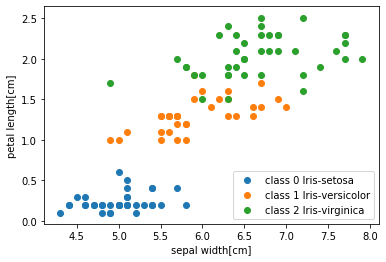

In [5]:
iris_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(0,3):
    plt.scatter(X_train[y_train == i, 0],
                X_train[y_train == i, 1],
            marker='o',
            label='class '+ str(i)+ ' '+ iris_names[i])

plt.xlabel('sepal width[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='lower right')

plt.show()

In [32]:
#Bayes algorithm
m1=[0,0]
m2=[0,0]
m3=[0,0]
c1=0
c3=0
c2=0
n1=0
n2=0
n3=0
for i in range(len(X_train)):
    if(y_train[i]==0):
        n1 = n1+1
        m1=m1+X_train[i]
    if(y_train[i]==1):
        n2 = n2+1
        m2=m2+X_train[i]
    if(y_train[i]==2):
        n3 = n3+1
        m3=m3+X_train[i]

m1 = m1/n1
m2 = m2/n2
m3 = m3/n3


for i in range(len(X_train)):
    if(y_train[i]==0):
        c1 = c1 + (X_train[i]-m1).dot((X_train[i]-m1).transpose())
    if(y_train[i]==1):
        c2 = c2 + (X_train[i]-m1).dot((X_train[i]-m2).transpose())
    if(y_train[i]==2):
        c3 = c3 + (X_train[i]-m1).dot((X_train[i]-m3).transpose())

        
    

In [6]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    #X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='',alpha=1.0,linewidth=1,marker='o',s=55, label='test set')

In [7]:
from cvxopt import matrix, solvers
from numpy import *
def rbf_kernel(x, y, sigma):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

def kernel_svm(X, y, x_test,y_test, sigma):
    n_samples, n_features = X.shape
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i,j] = rbf_kernel(X[i], X[j],sigma)
    P = matrix(np.outer(y,y) * K)
    q = matrix(np.ones(n_samples) * -1)
    A = matrix(np.zeros((1,n_samples)))
    for i in range(n_samples):
        A[0,i]=y[i]
    b = matrix(0.0)
    G = matrix(np.diag(np.ones(n_samples) * -1))
    h = matrix(np.zeros(n_samples))

    solution = solvers.qp(P, q, G, h, A, b)
    a = np.ravel(solution['x'])
    #support vector
    sv = a > 1e-5
    ind = np.arange(len(a))[sv]
    sv = X[sv]
    sv_y = y[sv]
    #b
    b = 0
    for n in range(len(self.a)):
        b += sv_y[n]
        b -= np.sum(a * sv_y * K[ind[n],sv])
        b /= len(a)
    y_hat = np.zeros(len(x_test))
    for i in range(len(x_test)):
        s = 0
        for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
            s += a * sv_y * self.kernel(x_test[i], sv)
        y_predict[i] = s
    return y_hat
  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


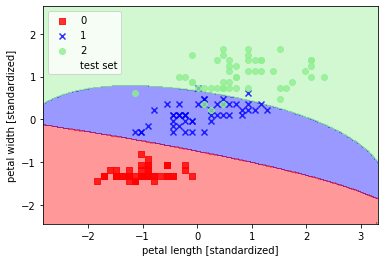

Accuracy for sklearn:	 0.9736842105263158
Accuracy :	 0.9553571428571429
Accuracy for sklearn:	 0.5
Accuracy :	 0.5


In [10]:
from sklearn.svm import SVC
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined_std = np.hstack((y_train,y_test))
X_train_std1 = []
X_test_std1 = []
for i in range(len(X_train1)):
    train_std = [X_train1[i,0]+X_train1[i,1]+X_train1[i,2],X_train1[i,3]+X_train1[i,4]+X_train1[i,5]]
    X_train_std1.append(train_std)
for i in range(len(X_test1)):
    test_std = [X_test1[i,0]+X_test1[i,1]+X_test1[i,2],X_test1[i,3]+X_test1[i,4]+X_test1[i,5]]
    X_test_std1.append(test_std)
y_hat_ = kernel_svm(X_train, y_train, X_test,y_test, 0.8)

svm = SVC(C=0.5, kernel='rbf', gamma=0.2, decision_function_shape='ovr')
svm.fit(X_train_std,y_train)
y_hat = svm.predict(X_test_std)

y_hat_1 = kernel_svm(X_train1, y_train1, X_test1,y_test1, 0.8)
svm1 = SVC(C=0.5, kernel='rbf', gamma=0.2, decision_function_shape='ovr')
svm1.fit(X_train_std1,y_train1)
y_hat1 = svm1.predict(X_test_std1)

plot_decision_regions(X_combined_std,y_combined_std, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')

plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()
print('Accuracy for sklearn:\t', accuracy_score(y_hat, y_test))
print('Accuracy :\t', accuracy_score(y_hat_, y_train))
print('Accuracy for sklearn:\t', accuracy_score(y_hat1, y_test1))
print('Accuracy :\t', accuracy_score(y_hat_1, y_train1))


In [10]:
#knn method
def euclidean_distance(x1, x2):
    
  #### TO-DO #####  
    for i in range(len(x1)):
        distance=np.sqrt(np.sum(np.square(x1[i]-x2[i])))
    return  distance
  ##############

In [11]:
def get_neighbors( X, y, x_test, k, distance= euclidean_distance):
    
  #### TO-DO #####  
    distances = []
    for i in range(len(X)):
        distance = euclidean_distance(x_test, X[i])
        distances.append((distance,y[i]))
    distances.sort()
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][1])

  ##############
    return neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
neighbors=[]
neighbors1=[]
for i in range(len(X_test)):
    neighbor = get_neighbors( X_train, y_train, X_test[i], 11, distance= euclidean_distance)
    neighbors.append(np.argmax(np.bincount(neighbor)))
for i in range(len(X_test1)):
    neighbor1 = get_neighbors( X_train1, y_train1, X_test1[i], 11, distance= euclidean_distance)
    neighbors1.append(np.argmax(np.bincount(neighbor1)))
    
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

knn1=KNeighborsClassifier()
knn1.fit(X_train1,y_train1)
y_hat = knn.predict(X_test)
y_hat1 = knn1.predict(X_test1)

print('iris Accuracy for sklearn:\t', accuracy_score(y_hat, y_test))    
print('iris Accuracy:\t', accuracy_score(neighbors, y_test))
print('happiness Accuracy for sklearn:\t', accuracy_score(y_hat1, y_test1))    
print('happiness Accuracy:\t', accuracy_score(neighbors1, y_test1))

iris Accuracy for sklearn:	 0.9736842105263158
iris Accuracy:	 0.9736842105263158
happiness Accuracy for sklearn:	 0.3611111111111111
happiness Accuracy:	 0.5
